In [2]:
import librosa
import IPython.display as ipd

def play_segment(audio_path, start_time=1, segment_duration=2):
    y, sr = librosa.load(audio_path)
    start_sample = int(start_time * sr)
    end_sample = int((start_time + segment_duration) * sr)
    segment = y[start_sample:end_sample]
    if segment.size > 0:
        ipd.display(ipd.Audio(data=segment, rate=sr))
    else:
        print("Selected segment is empty.")

audio_path = '/content/audioai.unknown'
play_segment(audio_path)

<ipython-input-2-b66d812c029f>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<ipython-input-5-c867ded20b6d>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


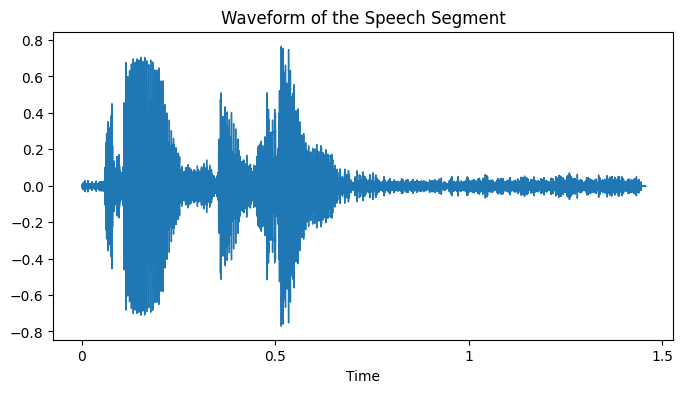

In [5]:
import matplotlib.pyplot as plt

def play_and_display_segment(audio_path, start_time=2, segment_duration=3.5):
    y, sr = librosa.load(audio_path)
    start_sample = int(start_time * sr)
    end_sample = int((start_time + segment_duration) * sr)

    segment = y[start_sample:end_sample]
    ipd.display(ipd.Audio(data=segment, rate=sr))
    plt.figure(figsize=(8, 4))
    librosa.display.waveshow(segment, sr=sr)
    plt.title('Waveform of the Speech Segment')
    plt.show()
audio_path = '/content/audioai.unknown'
play_and_display_segment(audio_path)

In [8]:
import soundfile as sf
from IPython.display import Audio

audio_file = "/content/audioai.unknown"
y, sr = librosa.load(audio_file, sr=None)
y_trimmed, _ = librosa.effects.trim(y)
trimmed_file_mp3 = "trimmed_speech.mp3"
sf.write(trimmed_file_mp3, y_trimmed, sr)

print("trimmed signal")
Audio(trimmed_file_mp3)


<ipython-input-8-61fd91821706>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


trimmed signal


In [9]:
audio_file = "/content/audioai.unknown"
y, sr = librosa.load(audio_file, sr=None)

top_db = 20
segments = librosa.effects.split(y, top_db=top_db)

for i, segment in enumerate(segments):
    split_segment = y[segment[0]:segment[1]]

    split_file = f"split_{i}.mp3"
    sf.write(split_file, split_segment, sr)

    print(f"Listening to split segment {i + 1} (top_db={top_db})...")
    Audio(split_segment, rate=sr)

<ipython-input-9-0274578a9908>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Listening to split segment 1 (top_db=20)...
Listening to split segment 2 (top_db=20)...
Listening to split segment 3 (top_db=20)...
Listening to split segment 4 (top_db=20)...
Listening to split segment 5 (top_db=20)...


<ipython-input-12-389a3c437bc0>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)


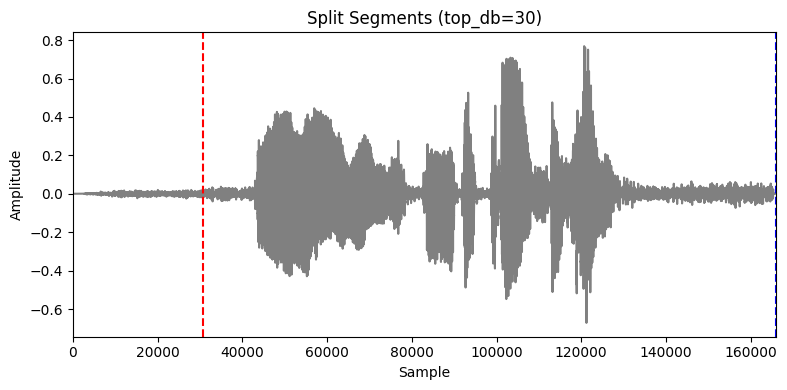

In [12]:

audio_file = "/content/audioai.unknown"
y, sr = librosa.load(audio_file, sr=None)
top_db = 30
segments = librosa.effects.split(y, top_db=top_db)
plt.figure(figsize=(8, 4))
plt.plot(y, color='gray')
for i, segment in enumerate(segments):
    plt.axvline(segment[0], color='r', linestyle='--')
    plt.axvline(segment[1], color='b', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title(f'Split Segments (top_db={top_db})')
plt.xlim(0, len(y))
plt.tight_layout()
plt.show()